In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import cv2
import glob
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load Metadata

In [2]:
path = "C:/Users/pasha/Downloads/UrbanSound8K/metadata/UrbanSound8K.csv"
urbansound8k = pd.read_csv(path)

In [3]:
urbansound8k.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


# Explore Data

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64


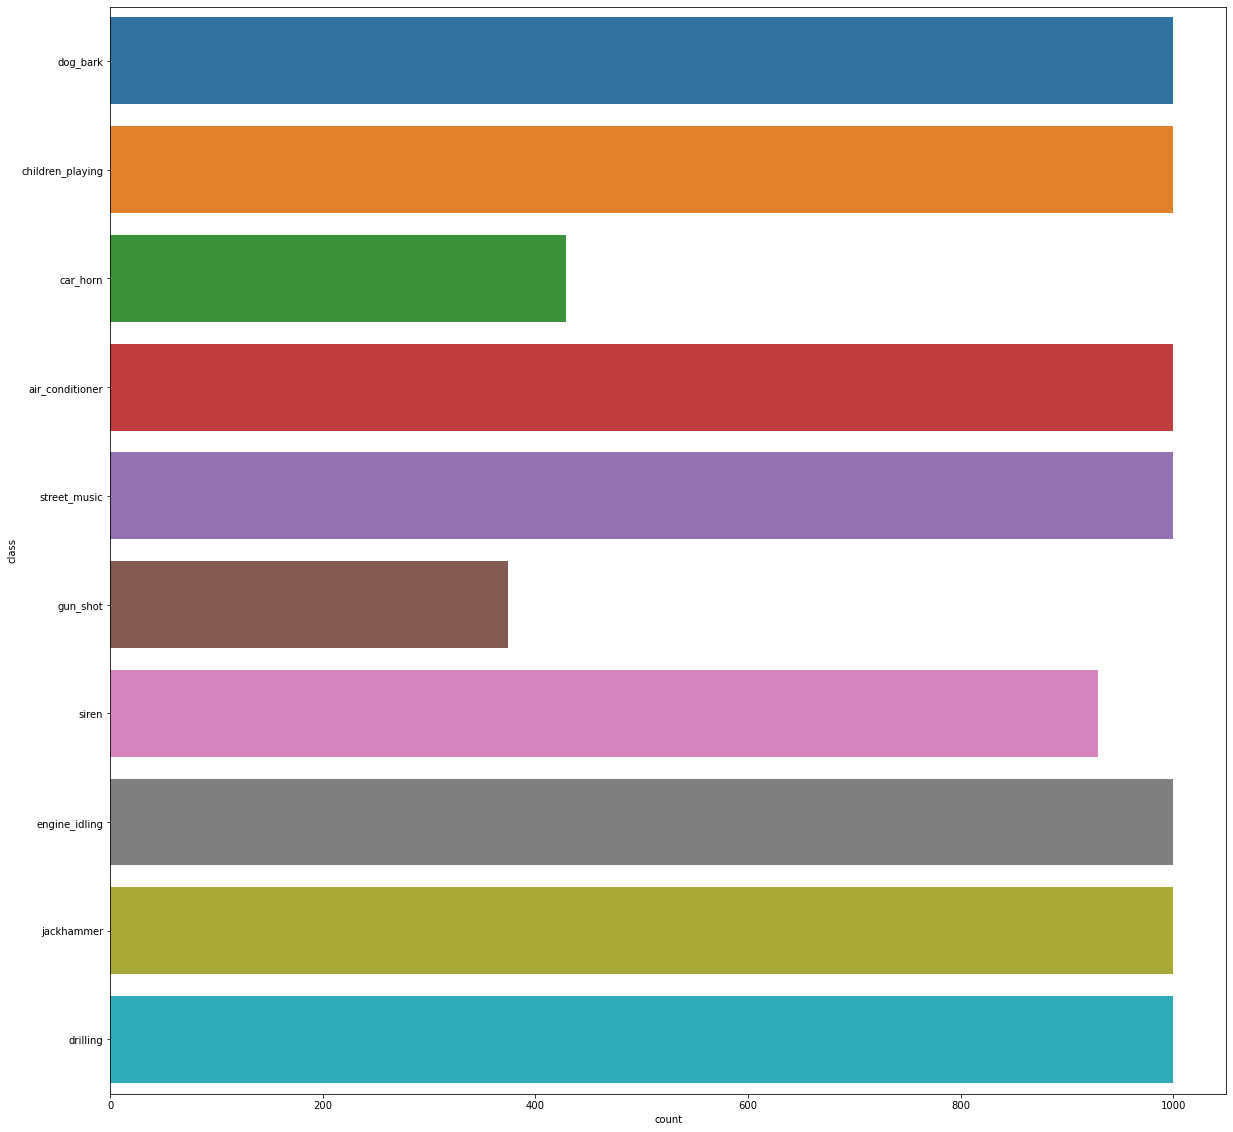

In [4]:
plt.figure(figsize=(20,20))
sns.countplot(y="class",data=urbansound8k)
print(urbansound8k["class"].value_counts())

# Preprocessing
For preprocessing part we are asked to complete few tasks.<br> 
Those are;
- Reading images from folder
- Changing images' color space from rgb to grayscale
- Resizing images
- Normalizing images

### How did we completed those tasks?
In first part we read images by using this __"cv2.imread(file)"__ command. After that, we use this as an input for other opencv function which used for changing images' color space __"cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2GRAY)"__. We applied final opencv function for resizing image __"cv2.resize(cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2GRAY), (32, 32))"__. That way we reduce the computation power of our model and reduce the complexity. Finally, we divide our images to 255 for normalizing them. Thats beacuse grayscale images takes pixel values between 0-255 (0 is black, 255 is white other values represented in tones of grays).<br>
#### We explained steps for operations applied on images. But how did we accessed them?
We used glob library for this __"for file in glob.glob('C:/Users/pasha/Downloads/spectrograms/{}/*.png'.format(i))"__. But what are the {} and .format(i) and whate are they being used for ? As you can see at the and of the line we have a for loop which iterates 10 times __"for i in range(10)"__. We set range 10 because we have 10 categorical features and 10 folders which they separeted by their categories. Each iteration we get index values starting from 0 and ends at 9. Since, our folders also named by same way,  we can access them by using this "__.../{}/'.format(i) for i in range(10)"__.<br>
#### How did we save the processed images?
We saved them into a list called images. In images is a 2d list which contains 10 categorical features. Also, for each category it contains preprocessed images and their categorical value. So in images list we can access the first image by following command __"images[0][1]"__. For acessing the categorical value of the first image of the first category by following command __"images[0][0]"__. 

In [5]:
images = []
for i in range(10):
    for file in glob.glob('C:/Users/pasha/Downloads/spectrograms/{}/*.png'.format(i)):
        images.append([cv2.resize(cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2GRAY), (32, 32))/255, i])
    

First image of the array


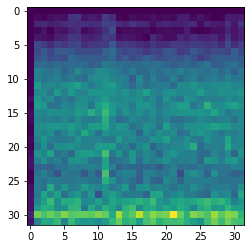

In [6]:
print("First image of the array")
plt.imshow(images[0][0])
plt.show()

# Shuffling
Before split our data set into train validation test, first we need to shuffle it. Because shuffling help us to overcome trap in local minima problem. It is a good approach to deal with nonconvex datasets. Also in a dataset where features sorted based on their categories model tends to learn similiar things and results with overfitting problem.

In [7]:
import random
# We shuffle our data before splitting it because our data is sorted base on their categories.
random.shuffle(images)

In [8]:
# Split dataset into features and labels
X = np.array([images[i][0] for i in range(len(images))])
y = np.array([images[i][1] for i in range(len(images))])

First image of the shuffled array


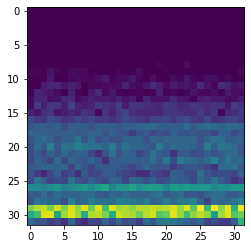

In [9]:
print("First image of the shuffled array")
plt.imshow(X[0])
plt.show()

In [10]:
print(f"Class of the first image in shuffled array: {y[0]}")

Class of the first image in shuffled array: 0


In [11]:
# Splitting 70% train 15% validation 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

In [12]:
# Saving train, validation, test sets into local file.
np.save("C:/Users/pasha/X_train.npy", X_train)
np.save("C:/Users/pasha/y_train.npy", y_train)
np.save("C:/Users/pasha/X_val.npy", X_val)
np.save("C:/Users/pasha/y_val.npy", y_val)
np.save("C:/Users/pasha/X_test.npy", X_test)
np.save("C:/Users/pasha/y_test.npy", y_test)